In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [55]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
datasets_list = keras.datasets.__all__
print("List of available datasets in Keras:")
print(datasets_list)

AttributeError: module 'keras.api._v2.keras.datasets' has no attribute '__all__'

In [56]:
# x_train = x_train/255
# x_test = x_test/255

In [57]:
x_train.shape

(60000, 28, 28)

In [32]:
x_test.shape

(10000, 28, 28)

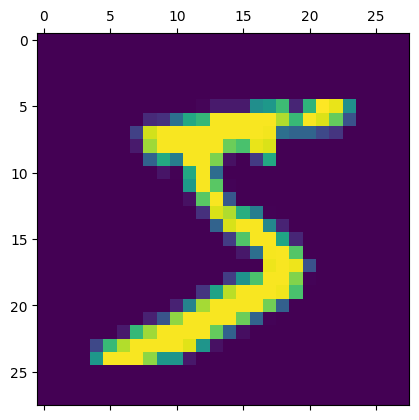

In [33]:
plt.matshow(x_train[0])

In [34]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [35]:
y_train[0]

5

In [36]:
# flatten the dataframe
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_train_flatten.shape

(60000, 784)

In [37]:
x_test_flatten = x_test.reshape(len(x_test), 28*28)
x_test_flatten.shape

(10000, 784)

In [38]:
x_test_flatten[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [39]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
])

model.compile( optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ["accuracy"]
)

model.fit(x_train_flatten, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 9.9795 - accuracy: 0.8368
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 6.0637 - accuracy: 0.8779
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 5.7162 - accuracy: 0.8841


In [40]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 5.8585 - accuracy: 0.8790


[5.858532428741455, 0.8790000081062317]

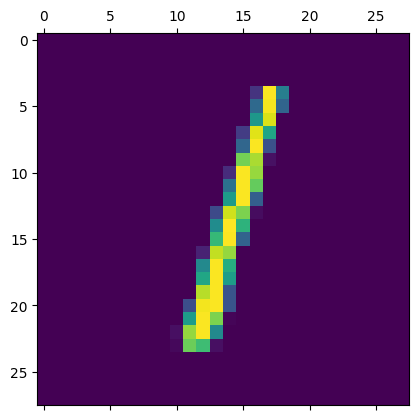

In [41]:
plt.matshow(x_test[2])

In [42]:
y_pred = model.predict(x_test_flatten)
index =np.argmax(y_pred[2])
index 

313/313 [==============================] - 0s 1ms/step


1

In [43]:
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[:5]

[3, 0, 1, 0, 2]

In [44]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [45]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    0,    3,    1,    0,    0,    0,    0,    0,    0],
       [   0, 1132,    2,    0,    0,    1,    0,    0,    0,    0],
       [ 242,  406,  374,    5,    5,    0,    0,    0,    0,    0],
       [  73,  303,  462,  172,    0,    0,    0,    0,    0,    0],
       [  32,  114,  216,  188,  431,    0,    0,    1,    0,    0],
       [ 115,   57,  259,  290,   87,   84,    0,    0,    0,    0],
       [ 321,   66,  527,   23,   17,    3,    1,    0,    0,    0],
       [  48,  190,  177,  450,   62,   50,    0,   51,    0,    0],
       [  54,  371,  473,   43,   13,   19,    0,    1,    0,    0],
       [  32,  144,  187,  433,  203,    1,    0,    9,    0,    0]])>

Text(95.72222222222221, 0.5, 'Truth')

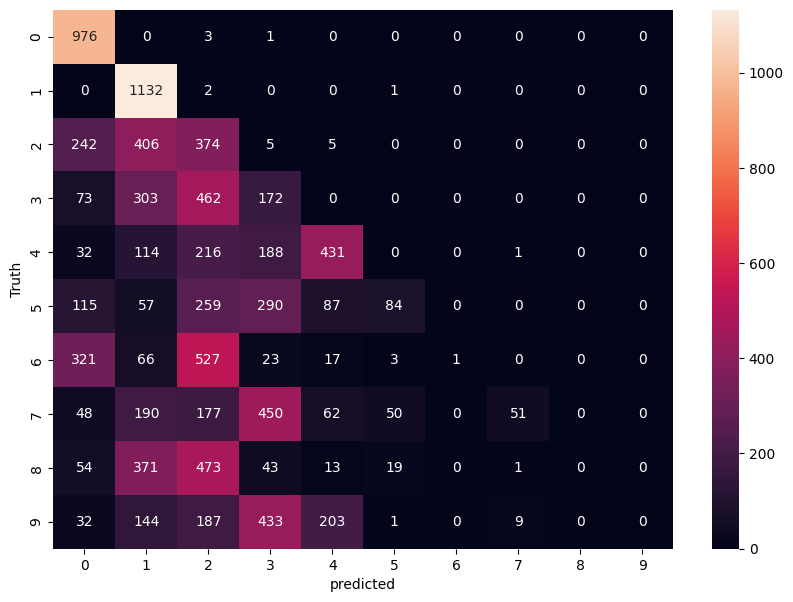

In [46]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel("Truth")

In [47]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(50, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile( optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ["accuracy"]
)

model.fit(x_train_flatten, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6056 - accuracy: 0.8335
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3069 - accuracy: 0.9107
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2720 - accuracy: 0.9193


In [48]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2803 - accuracy: 0.9159


[0.28025469183921814, 0.9158999919891357]

In [49]:
y_pred = model.predict(x_test_flatten)
y_pred_label = [np.argmax(i) for i in y_pred]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

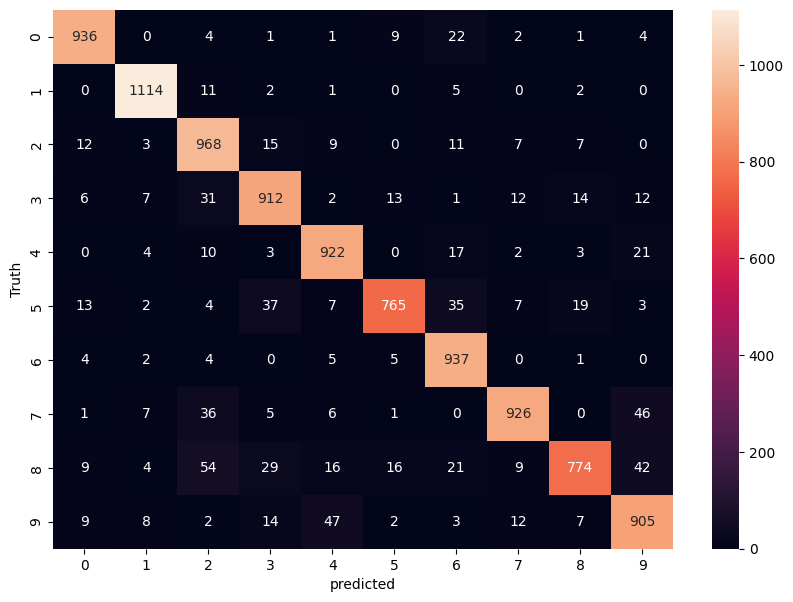

In [50]:
cm  = tf.math.confusion_matrix(labels= y_test, predictions = y_pred_label)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel("Truth")

In [51]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation = 'relu'),
    keras.layers.Dense(50, activation = 'sigmoid'),
    keras.layers.Dense(30, activation = 'sigmoid'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile( optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ["accuracy"]
)

model.fit(x_train_flatten, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7590 - accuracy: 0.8141
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3456 - accuracy: 0.9002
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2959 - accuracy: 0.9140


313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

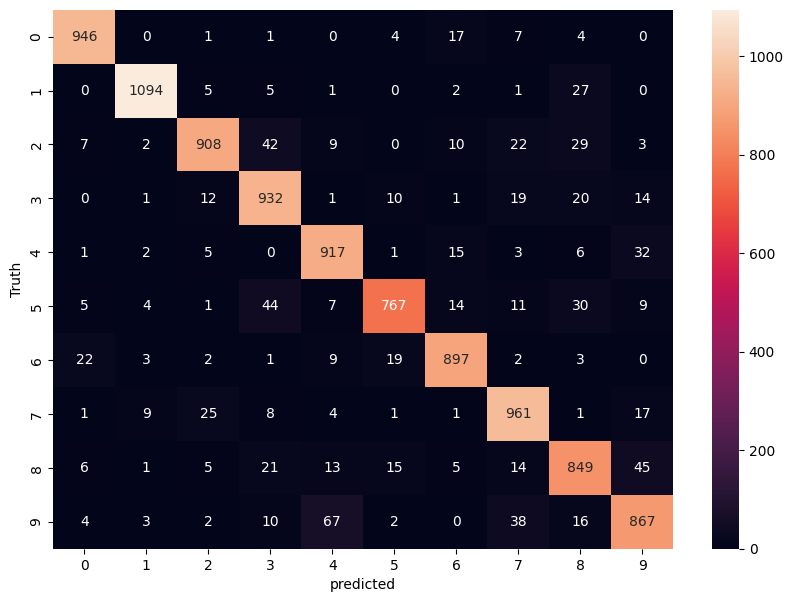

In [52]:
model.evaluate(x_test_flatten,y_test)
y_pred = model.predict(x_test_flatten)
y_pred_label = [np.argmax(i) for i in y_pred]
cm  = tf.math.confusion_matrix(labels= y_test, predictions = y_pred_label)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel("Truth")

In [59]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape= (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir = "logs/", histogram_freq=1)

model.compile( optimizer = 'SGD',
              loss = 'sparse_categorical_crossentropy',
              metrics = ["accuracy"]
)

model.fit(x_train, y_train, epochs = 5, callbacks = [tb_callback])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 18.0703 - accuracy: 0.2262
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9718 - accuracy: 0.2420
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9863 - accuracy: 0.2545
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9719 - accuracy: 0.2666
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9845 - accuracy: 0.2585


In [60]:
%load_ext tensorboard
%tensorboard --logdir logs/fit